# Ritz approximation and dissipative barrier methods for a Sturm-Liouville operator

In this notebook we will aim to compare a dissipative barrier method against the high-accuracy
eigenvalue calculation method outlined in [1] for finding the eigenvalues of the
Sturm-Liouville operator

$$Ly = -y'' + Q(x)y$$

where $Q(x) = \sin(x) - \frac{40}{1+x^2}$.

[1] Aceto, Ghelardoni & Marletta (2006) Numerical computation of eigenvalues in spectral gaps of Sturm–Liouville operators, Journal of Computational and Applied Mathematics

In [8]:
from typing import Dict

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from specpol.ritz import ritz_sturm_liouville, ritz_unbounded_sturm_liouville
from specpol.plot import plot_ritz

In [9]:
from matplotlib import colormaps

def plot(ritz_results: Dict[int, np.array], dbm = None):
    # plot the approximation with some added bars and lines

    fig, ax1, ax2 = plot_ritz(ritz_results, dbm)

    ax1.set_ylim(-0.5, 2.5)
    ax1.axhline(0.335936534279424, linestyle='--', alpha=0.6)
    ax1.axhline(0.536620364148446, linestyle='--', alpha=0.6)
    ax1.axhline(0.580834838005921, linestyle='--', alpha=0.6)
    ax1.axhline(0.591500609480355, linestyle='--', alpha=0.6)

    ax1.axhline(0.949634991713441, linestyle='--', alpha=0.6)
    ax1.axhline(1.24466406161563, linestyle='--', alpha=0.6)
    ax1.axhline(1.29192807845892, linestyle='--', alpha=0.6)

    ax1.axhspan(-0.3784, -0.34766, facecolor='green', alpha=0.2)
    ax1.axhspan(0.594799, 0.9180581788, facecolor='green', alpha=0.2)
    ax1.axhspan(1.2931662851, 2.2851569481, facecolor='green', alpha=0.2)

    ax2.set_xlim(-0.5, 1.5)
    ax2.set_ylim(-0.5, 1.25)

    ax2.axvline(0.335936534279424, linestyle='--', alpha=0.6)
    ax2.axvline(0.536620364148446, linestyle='--', alpha=0.6)
    ax2.axvline(0.580834838005921, linestyle='--', alpha=0.6)
    ax2.axvline(0.591500609480355, linestyle='--', alpha=0.6)

    ax2.axvline(0.949634991713441, linestyle='--', alpha=0.6)
    ax2.axvline(1.24466406161563, linestyle='--', alpha=0.6)
    ax2.axvline(1.29192807845892, linestyle='--', alpha=0.6)

    ax2.axvspan(-0.3784, -0.34766, facecolor='green', alpha=0.2)
    ax2.axvspan(0.594799, 0.9180581788, facecolor='green', alpha=0.2)
    ax2.axvspan(1.2931662851, 2.2851569481, facecolor='green', alpha=0.2)

    plt.show()

In [10]:
def potential(x):  # the potential Q(x) of the Sturm-Liouville operator
    return np.sin(x) - 40/(1+x**2)

In [ ]:
sl_spec = dict()
sl_spec_dbm = dict()

for i in tqdm(range(50, 375, 25)):
    sl_spec[i] = ritz_sturm_liouville(potential, 70*np.pi, i, 321, False)
    sl_spec_dbm[i] = ritz_sturm_liouville(potential, 70*np.pi, i, 321, True)

In [ ]:
plot(sl_spec)
plot(sl_spec_dbm)
plot({350: sl_spec[350]})
plot({350: sl_spec_dbm[350]})
plot(sl_spec_dbm, dbm=0.95)
plot({350: sl_spec_dbm[350]}, dbm=0.95)

In [ ]:
import pickle

with open('aceto-nodbm.pickle', 'wb') as handle:
    pickle.dump(sl_spec, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('aceto-dbm.pickle', 'wb') as handle:
    pickle.dump(sl_spec_dbm, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
rusl = dict()
for i in tqdm(range(50, 400, 50)):
    rusl[i] = ritz_unbounded_sturm_liouville(potential, i, 161)

100%|██████████| 7/7 [06:55<00:00, 59.30s/it]


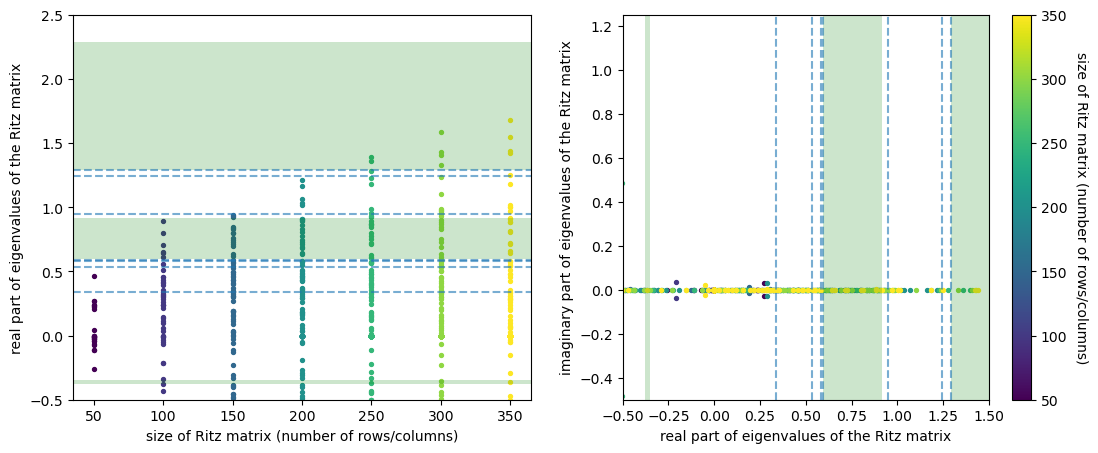

In [11]:
plot(rusl)

In [12]:
rusl_dbm = dict()
for i in tqdm(range(50, 400, 50)):
    rusl_dbm[i] = ritz_unbounded_sturm_liouville(potential, i, 161, dbm=True)

100%|██████████| 7/7 [06:11<00:00, 53.11s/it]


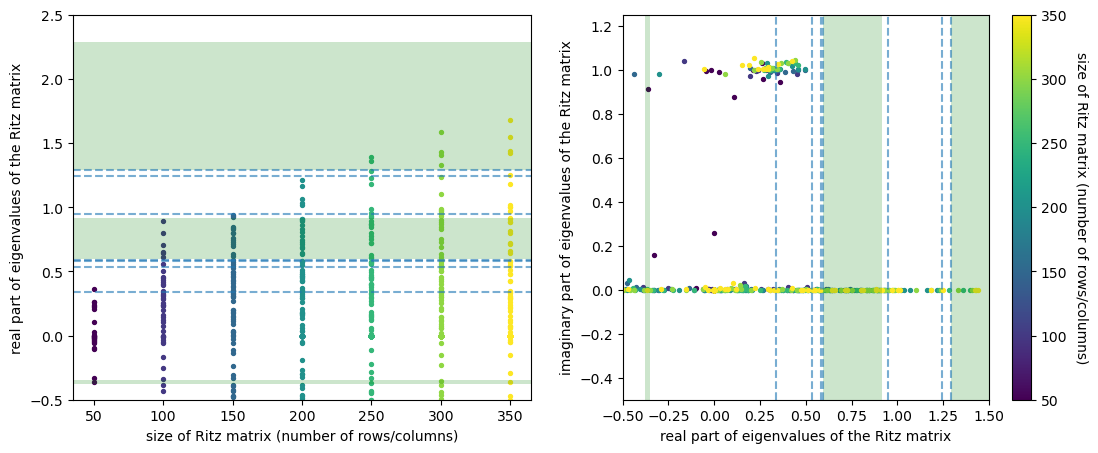

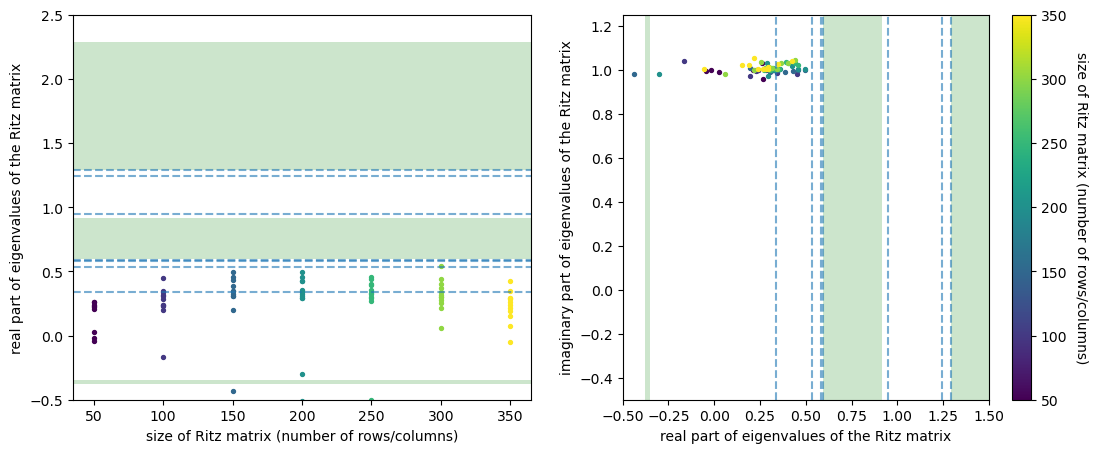

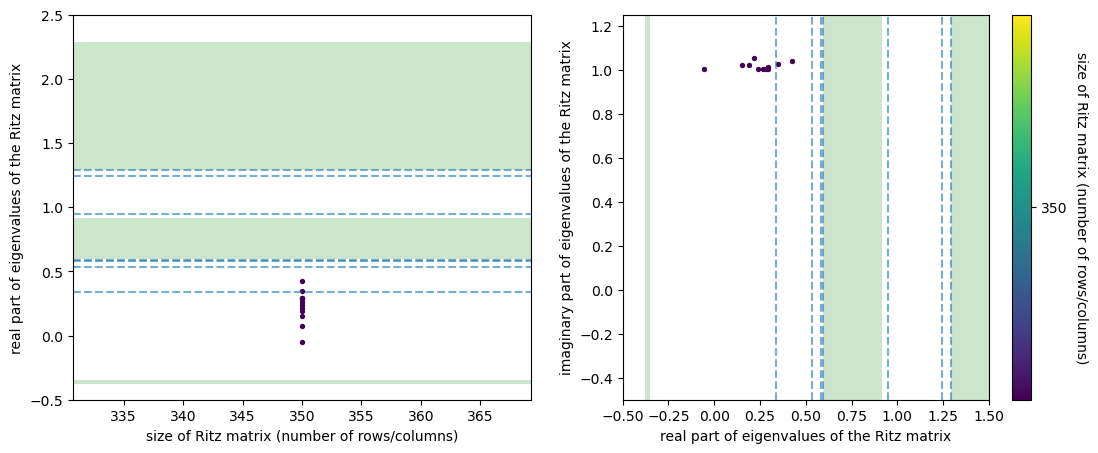

In [15]:
plot(rusl_dbm)
plot(rusl_dbm, dbm=0.95)
plot({350: rusl_dbm[350]}, dbm=0.95)

In [14]:
import pickle

with open('aceto-unbdd-nodbm.pickle', 'wb') as handle:
    pickle.dump(rusl, handle, protocol=pickle.HIGHEST_PROTOCOL)

